# 第5回講義 宿題

## 課題. Tensorflowを用いて, MNISTを多層パーセプトロン(MLP)で学習せよ

### 注意

- homework関数を完成させて提出してください
    - 訓練データはtrain_X, train_y, テストデータはtest_Xで与えられます
    - train_Xとtrain_yをtrain_X, train_yとvalid_X, valid_yに分けるなどしてモデルを学習させてください
    - test_Xに対して予想ラベルpred_yを作り, homework関数の戻り値としてください
- pred_yのtest_yに対する精度(F値)で評価します
- 全体の実行時間がiLect上で60分を超えないようにしてください
- homework関数の外には何も書かないでください (必要なものは全てhomework関数に入れてください)
- 解答提出時には Answer Cell の内容のみを提出してください

- CNNは使わないでください

**`tf` の以下のモジュールはこの回では使用できないように制限されています. 注意してください.**
```python
tf.app
tf.compat
tf.contrib
tf.erros
tf.gfile
tf.graph_util
tf.image
tf.layers
tf.logging
tf.losses
tf.metrics
tf.python_io
tf.resource_loader
tf.saved_model
tf.sdca
tf.sets
tf.summary
tf.sysconfig
tf.test
tf.train
```

次のセルのhomework関数を完成させて提出してください

# Answer Cell

In [16]:
def homework(train_X, train_y, test_X):
    # WRITE ME!
    import time
    import matplotlib.pyplot as plt
    #%matplotlib inline
    
    #definition
    
    eps=0.1
    #epoch_num=60
    rng = np.random.RandomState(1234)
    random_state = 42
    
    x = tf.placeholder(tf.float32, [None, 784])
    t = tf.placeholder(tf.float32, [None, 10])
    
    w1 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(784, 100)).astype('float32'), name='w1')
    b1 = tf.Variable(tf.zeros(100), name='b1')
    
    w2 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(100, 50)).astype('float32'), name='w2')
    b2 = tf.Variable(tf.zeros(50), name='b2')
    
    w3 = tf.Variable(np.random.uniform(low=-0.08, high=0.08, size=(50, 10)).astype('float32'), name='w3')
    b3 = tf.Variable(tf.zeros(10), name='b3')
    
    params = [w1, b1, w2, b2, w3, b3]
    
    #forward
    
    u1 = tf.matmul(x,w1)+b1
    z1 = tf.nn.sigmoid(u1)
    
    u2 = tf.matmul(z1,w2)+b2
    z2 = tf.nn.sigmoid(u2)
    
    u3 = tf.matmul(z2,w3)+b3
    z3 = tf.nn.softmax(u3)
    
    y=z3
    
    # Step3. 誤差関数の定義
    #cost = -tf.reduce_mean(tf.reduce_sum(t*tf.log(y)))
    # tf.log(0)によるnanを防ぐ
    cost = -tf.reduce_mean(tf.reduce_sum(t*tf.log(tf.clip_by_value(y, 1e-10, 1.0)),axis=1))
    #cost = -np.log(y[0,np.nonzero(t)])
    
    #delta
    gw1, gb1, gw2, gb2, gw3, gb3 = tf.gradients(cost, params)
    updates = [
        w1.assign_add(-eps*gw1), # 勾配降下法
        b1.assign_add(-eps*gb1),
        w2.assign_add(-eps*gw2), # 勾配降下法
        b2.assign_add(-eps*gb2),
        w3.assign_add(-eps*gw3), # 勾配降下法
        b3.assign_add(-eps*gb3),
    ]

    train = tf.group(*updates)
    
    valid = tf.argmax(y, 1)
    
    start_time=time.time()
    
    #Online learning
    
    #cost_plt =[]
    #sess = tf.Session()
    #sess.run(tf.global_variables_initializer()) # 重みの初期化
    #for epoch in range(epoch_num):
    #    cost_arry = []
    #    for x_in, y_in in zip(train_X, train_y):
    #        x_in = x_in.reshape(1,len(x_in))
    #        y_tmp = np.zeros(10).reshape(1, 10)
    #        y_tmp[0,y_in] = 1.0
    #        y_in=y_tmp
    #        _cost, _ = sess.run([cost, train], feed_dict={x: x_in, t: y_in})
    #        cost_arry.append(_cost)
    #        
    #    cost_plt.append(np.sum(cost_arry))
    #    tttttt = time.time() - start
    #    print ("epoch",epoch,"time",tttttt,"cost",cost_plt[len(cost_plt)-1])
        #print(cost_plt)
    #plt.plot(cost_plt)
    
    #batch learning
    n_epochs = 300
    batch_size = 100
    n_batches = train_X.shape[0] // batch_size
    
    nb_classes = 10                                #train_y one-hot
    targets = train_y.reshape(-1)
    one_hot_targets = np.eye(nb_classes)[targets]
    train_y = one_hot_targets
    
    # Step5. 学習
    cost_plt =[]
    with tf.Session() as sess:
        print("start time",start_time)
        sess.run(tf.global_variables_initializer())
        for epoch in range(n_epochs):
            train_X, train_y = shuffle(train_X, train_y, random_state=random_state)
            cost_arry = []
            for i in range(n_batches):
                start = i * batch_size
                end = start + batch_size
                _cost, _ = sess.run([cost,train], feed_dict={x: train_X[start:end], t: train_y[start:end]})
                cost_arry.append(_cost)
                
            cost_plt.append(np.sum(cost_arry))
            tttttt = time.time()-start_time
            #predict
            #print ("epoch",epoch,"time",tttttt,"cost",cost_plt[len(cost_plt)-1])
        pred_y = sess.run(valid, feed_dict={x: test_X})
        print("time",time.time()-start_time)
        #plt.plot(cost_plt)
    
    # Step6. 予測
    #pred_y = np.argmax(sess.run(y, feed_dict={x: test_X}),1)

    #sess.close()
    
    
    
    return pred_y

- 以下のvalidate_homework関数を用いてエラーが起きないか動作確認をして下さい。
- 提出に際して、以下のscore_homework関数で60分で実行が終わることを確認して下さい。
- 評価は以下のscore_homework関数で行われますが、random_stateの値は変更されます。

# Checker Cell (for student)

In [17]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

del [
        tf.app,
        tf.compat,
        tf.contrib,
        tf.errors,
        tf.gfile,
        tf.graph_util,
        tf.image,
        tf.layers,
        tf.logging,
        tf.losses,
        tf.metrics,
        tf.python_io,
        tf.resource_loader,
        tf.saved_model,
        tf.sdca,
        tf.sets,
        tf.summary,
        tf.sysconfig,
        tf.test,
        tf.train
    ]

def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:1000]
    train_y_mini = train_y[:1000]
    test_X_mini = test_X[:1000]
    test_y_mini = test_y[:1000]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))

AttributeError: app

In [18]:
validate_homework()
#score_homework()

start time 1494687248.9957433
time 6.668147802352905
0.818011287119


start time 1494686514.3962884
epoch 0 time 1.3128020763397217 cost 1282.96
epoch 1 time 2.580892324447632 cost 1053.36
epoch 2 time 3.8719305992126465 cost 551.524
epoch 3 time 5.143477916717529 cost 375.435
epoch 4 time 6.424375057220459 cost 284.147
epoch 5 time 7.7073814868927 cost 232.635
epoch 6 time 8.98240065574646 cost 205.503
epoch 7 time 10.257305383682251 cost 188.421
epoch 8 time 11.534261226654053 cost 175.616
epoch 9 time 12.812152862548828 cost 164.942
epoch 10 time 14.086116790771484 cost 155.647
epoch 11 time 15.354918718338013 cost 147.27
epoch 12 time 16.63156533241272 cost 139.44
epoch 13 time 17.91119122505188 cost 132.305
epoch 14 time 19.18448543548584 cost 125.528
epoch 15 time 20.455199241638184 cost 119.361
epoch 16 time 21.7320499420166 cost 113.614
epoch 17 time 23.003784656524658 cost 108.567
epoch 18 time 24.275479555130005 cost 103.482
epoch 19 time 25.55088472366333 cost 99.1859
epoch 20 time 26.82466769218445 cost 94.9684
epoch 21 time 28.10554695129394

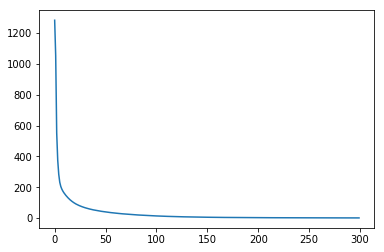

In [12]:
score_homework()